<a href="https://colab.research.google.com/github/Artificial-i/-1-5/blob/main/hal_Tamrin1_Trm5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tamrin 2 az Term 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing


55

55

In [ ]:
df=pd.read_csv('used_cars.csv')
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [ ]:
df.shape
df.columns
df.dtypes
df.info()
df.nunique()
# df['buying'].value_counts()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
# تغییر دیتا تایپ داده ها

df['name'] = df['name'].astype('category')
df['year'] = df['year'].astype('category')
df['selling_price'] = df['selling_price'].astype('category')
df['km_driven'] = df['km_driven'].astype('category')
df['fuel'] = df['fuel'].astype('category')
# df['seller_type	'] = df['seller_type	'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['owner'] = df['owner'].astype('category')
df['mileage'] = df['mileage'].astype('category')
df['engine'] = df['engine'].astype('category')
df['torque'] = df['torque'].astype('category')
df['max_power'] = df['max_power'].astype('category')
df['seats	'] = df['seats'].astype('category')
df['seller_type	'] = df['seller_type'].astype('category')


df.dtypes


,0
name,category
year,category
selling_price,category
km_driven,category
fuel,category
seller_type,object
transmission,category
owner,category
mileage,category
engine,category


In [ ]:
# به دست اوردن نال ها
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
# تبدیل نال ها
df['mileage']=df['mileage'].fillna(df['mileage'].mode()[0])
df['engine']=df['engine'].fillna(df['engine'].mode()[0])
df['max_power']=df['max_power'].fillna(df['max_power'].mode()[0])
df['torque']=df['torque'].fillna(df['torque'].mode()[0])
df['seats']=df['seats'].fillna(df['seats'].mode()[0])
df['seats\t']=df['seats\t'].fillna(df['seats\t'].mode()[0])

df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [ ]:
#پیدا کردن ولیوهای گم شده روش سوم

df['selling_price'].plot(kind='box')
plt.show()
# year
df['selling_price'].plot(kind='box')
plt.show()

TypeError: no numeric data to plot

In [ ]:
# حذف دو رکوردپرت
df=df[(-2< df['selling_price']) & (df['selling_price']<2) & (-2< df['selling_price']) & (df['selling_price']<2)]
df.shape

TypeError: Unordered Categoricals can only compare equality or not

In [ ]:
# حدف رکورد های غیر ضروری
df=df.drop(['mileage', 'seller_type'],axis=1)
df.head()


In [ ]:
# بررسی توضیع نرمال
# داده های عددی مورد بررسی قرار میگیرد
# آیا توضیع نرمال درست اتقاف اقتاده یانه ؟ برای این کار عملیات زیر را انحام میدهیم
# باید لوگاریت و رادیکال ریت را محاسبه کنیم
# به این دلیل این دو تا -Log_RateوLog_Sqrt-را آوردیم که هر کدام بهتر باشد ان را جایگزین کنیم
df['Log_seats'] = np.log(df['seats'])
df['Sqrt_seats'] = np.sqrt(df['seats'])
df.head()
# df.dtypes

In [ ]:
# چولگی را باید حساب کنیم
# هر ستون عددی هست باید اینگونه بررسی شودو گولگی این ستون به
# دست بیایید
# هر چه به صفر نزیکتر بشه بهتره هست
from scipy.stats import skew
print(f"seats Skewness : {skew(df['seats'])}")
print(f"Log_seats Skewness : {skew(df['Log_seats'])}")
print(f"Sqrt_seats Skewness : {skew(df['Sqrt_seats'])}")

In [ ]:
# البته به بررسی قبل نمی شود اعتماد کرد لذا این عملیات را انجام می دهیم
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(x=df['seats'], ax=axes[0])
sns.histplot(x=df['Log_seats'], ax=axes[1])
sns.histplot(x=df['Sqrt_seats'], ax=axes[2])
axes[0].set_title('seats')
axes[1].set_title('Log_seats')


In [ ]:
# برای اینکه از بین این سه تا بهترین را انتخاب کنیم میانگین هر سه تا را محاسبه میکنیم تا بهترین میانگین بدست بیایید
print(f"Mean of rate : {df['seats'].mean()}")
print(f"Mean of Log_Rate : {df['Log_seats'].mean()}")
print(f"Mean of Sqrt_Rate : {df['Sqrt_seats'].mean()}")

In [ ]:
# اینجا هم حساب کردیم ببینیم ستون ریت چند تا یا چند درصد نزدیک به صفر داریم تا ان بهتر را انتخاب کنیم
#  ریت را بیاور و ببین بین منفی نیم و مثبت نیم جمعشان چقد میشود که مشخص شده چهل تا از ریت های بین منفی نیم و مثبت نیم هستند در نتیجه  تصمیم گرفتیم که اسکیو ریت را جایگزین این دو کنیم تا نرمال تر شوند دیتاها و به همین دلیل ان دو تا را حذف کردیم
count= df['Log_seats'].between(-0.5, 0.5).sum()
print(f"Number of rate values between -0.5 and 0.5 : {count}")
print(f"{count/df.shape[0]:0.2f}")

In [ ]:
# حذف کردن دوتایی که نرمال نبودند و تغییر نام یک ستون

df = df.drop(columns=['seats', 'Log_seats'])

df=df.rename(columns={'Sqrt_seats': 'seats'})
df.head()

In [ ]:
# استاندارد سازی
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

In [ ]:
from scipy.stats import skew
print(f"Rate skewness : {skew(df['fuel'])}")
print(f"Loan Amount Sdewness : {skew(df['fuel'])}")

In [ ]:
sns.histplot(df['fuel'], bins=30, kde=True)
plt.title('Histogram of Rate')
plt.xlabel('Rate')
plt.ylabel('Freq')
plt.show()


sns. histplot(df['fuel'], bins=30, kde=True)
plt.title('Histogram of Rate')
plt.xlabel('Freq')
plt.show()

In [ ]:
df_dummies = pd.get_dummies(df, columns=['transmission'], prefix='LT', drop_first=False)
df.head()

In [ ]:
# اینکودر کردن داده های کتگوری کال با لیبل این کودر
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_series = pd.Series(label_encoder.fit_transform(df['fuel']), name= 'fuel')
encoded_series=encoded_series.reset_index(drop=True)
df= df.reset_index(drop=True)
df_label = pd.concat([df.drop('fuel', axis=1), encoded_series], axis=1)
df_label
df=df_label
df.head()



In [ ]:
# پیدا کردن ولیوهای گم شده
# اول ستونههای عددی را بیرون میکشیم
df_numeric_features=df.select_dtypes(include=['number'])
print(f"Numeric Features :\n{df_numeric_features}\n")

df_catagory_features=df.select_dtypes(include=["category"])
print(f"Catigorical Features :\n{df_catagory_features}\n")

df_float64_features=df.select_dtypes(include=['float64'])
print(f"Float64 Features :\n{df_float64_features}\n")

df_object_features=df.select_dtypes(include=['object'])
print(f"Object Features :\n{df_object_features}\n")


In [ ]:
# چسپاندن دیتافریم های بالا به هم

df_catagory_features.reset_index(drop=True, inplace=True)
df_float64_features.reset_index(drop=True, inplace=True)
df_object_features.reset_index(drop=True, inplace=True)

df = pd.concat([df_catagory_features, df_float64_features, df_object_features], axis=1)
df.head()

In [ ]:
# اینکودر کردن داده های کتگوری کال با لیبل این کودر
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_series = pd.Series(label_encoder.fit_transform(df['year']), name= 'year')
encoded_series=encoded_series.reset_index(drop=True)
df= df.reset_index(drop=True)
df_label = pd.concat([df.drop('year', axis=1), encoded_series], axis=1)
df_label
df=df_label
df.head()



In [ ]:
# مجموعه ازمون و آموزش
from sklearn.model_selection import train_test_split
X = df.drop('seats', axis=1)
y = df['seats']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8, random_state =0)
X_train.shape , X_test.shape , y_train.shape , y_test.shape



In [ ]:
# بررسی سینگل رگریشن
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_single = X_train[['Log_seats']]
X_test_single = X_test[['Log_seats']]

slr_model = LinearRegression()
slr_model.fit(X_train_single, y_train)

y_pred_single = slr_model.predict(X_test_single)

mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

print(f"MSE: {mse_single}")
print(f"R2: {r2_single}")

In [ ]:
# رگرسیون چند خطی
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred_multi = mlr_model.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"MSE: {mse_multi}")
print(f"R2: {r2_multi}")

In [ ]:
# رگرسیون چند جمله ای

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree {2}) - MSE: {mse_poly}, R2: {r2_poly}")

In [ ]:
# تغییر مقدارهای غیر عددی
df = pd.get_dummies(df, columns=['name', 'fuel','transmission',	'owner','engine',	'max_power'], drop_first=True)
df.head()

In [ ]:
# پیدا کردن ولیوهای گم شده
from sklearn.impute import SimpleImputer
df.head()
# داده های عددی را پیدا کرد
imputer1 = SimpleImputer(strategy='mean')
df_numeric_features = pd.DataFrame(imputer1.fit_transform(df_numeric_features),columns=df_numeric_features.columns)
df.head()

# دادهای کت گری را پیدا کرد
# imputer2 = SimpleImputer(strategy='most_frequent')
# df_catagory_features = pd.DataFrame(imputer2.fit_transform(df_catagory_features),columns=df_catagory_features.columns)

In [ ]:
# ستونهای مربوط به تاریخ و زمان را پیدا کرد
most_frequent_date = df_datetime_features['year'].mode()[0]
df_datetime_features['year']=df_datetime_features['year'].fillna(most_frequent_date)

most_frequent_date= df_datetime_features['loan_end'].mode()[0]
df_datetime_features['loan_end']=df_datetime_features['loan_end'].fillna(most_frequent_date)

In [ ]:
#پیدا کردن ولیوهای گم شده روش سوم

df['km_driven'].plot(kind='box')
plt.show()
# year
df['selling_price'].plot(kind='box')
plt.show()

In [ ]:
# حذف سه رکورد پرت
df=df[(-3< df['km_driven']) & (df['km_driven']<3) & (-3< df['selling_price']) & (df['selling_price']<3)]
df.shape

In [ ]:
# حذف دو ستونی که آورده شده بود تا به کمکش ان داده های پرت را پیدا کنیم
df=df.drop(['km_driven','selling_price'],axis=1)
df.head()

In [ ]:
print('ali')

In [ ]:
# from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_regression

In [ ]:
# ds_iris=load_iris()
# ds_california_housting=fetch_california_housing()
# X,y=make_regression(n_samples=20,n_features=3,noise=0.1)

# print(f"iris Dataset:{ds_iris}")
# print(100*"*")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
# df=pd.read_csv('hospital.csv')
df=pd.read_csv('diabetes_all_2016.csv')

In [ ]:
df.attrs

In [ ]:
df.head()
df.head(10)
df.tail()
df.describe
df.columns
df.index
df.attrs
df.value_counts
df.values
df.dtypes

In [ ]:
?df.head(10)


In [ ]:
df.tail()

In [ ]:
df.columns


In [ ]:
df.attrs


In [ ]:
df.value_counts


In [ ]:
df.value


In [ ]:
import pandas as pd

In [ ]:
pd.Series([1,2,3,4,5])

In [ ]:
pd.Series([range(1,10)])

In [ ]:
df.iloc[10]

In [ ]:
df.value

In [ ]:
df.attrs

In [ ]:
 from sklearn import datasets

In [ ]:
ds=datasets.load_iris()


In [ ]:
ds.feature_names
ds.data
ds.target_names
ds.target
print(ds.DESCR)

In [ ]:
import pandas as pd
target_names = ds.target_names
targets = ds.target
target_series = pd.Series(targets)
target_series = target_series.replace({0:target_names[0],1:target_names[1],2:target_names[2]})

In [ ]:
# ds.data[10,0]
# ds.data[10,0:3]
ds.data[1:5,:3]
# ds.target[0]
# target_series[60:70]

In [ ]:
from sklearn.datasets import make_regression
# X,y=make_regression(n_samples=20, n_features=3,noise=0.1)
# X.shape
# X.dtype

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=20, n_features=5,n_classes=2)
X.shape
X.dtype

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = np.array([24,38,41,72,58,82,124]).reshape(-1,1)
y = np.array([2,3,4,5,6,7,8])
model=LinearRegression()
model.fit(X, y)
print(f"model intercept:{model.intercept_}")
print(f"model conf:{model.coef_}")
y_pred=model.predict(X)
mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
print(f"R-squared:{r2}")

In [ ]:
# print(y)
# print(y_pred)

In [ ]:
print(f"Mean Squared Error:{mse}")


In [ ]:
new_X=np.array([52,96,32,41,79,62]).reshape(-1,1)


In [ ]:
predicted_y=model.predict(new_X)
print(f"X and y:\n{new_X}==> {predicted_y}")

In [ ]:
plt.scatter(X,y,color='blue')

plt.plot(X,y_pred,color='red')

plt.scatter(new_X,predicted_y,color='green')

plt.xlabel('X values')
plt.ylabel('y value')
plt.title('Single variable linear regression')
plt.legend(['Real data','Estimated line','New data'])
plt.grid(True)

In [ ]:
# //////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
# video 17

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def normal_equation(X,y):
  return np.linalg.inv(X.T @ X) @ X.T @ y


In [ ]:
def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred)** 2)

In [ ]:
def r2_score(y_true, y_pred):
  ss_residual=np.sum((y_true - y_pred)**2)
  ss_total=np.sum((y_true - np.mean(y_true))**2)
  return 1 - (ss_residual/ss_total)

In [ ]:
X=np.array([24,38,41,72,58,82,124]).reshape(-1,1)
y=np.array([2,3,4,5,6,7,8])

In [ ]:
# X=np.c_[np.ones((X.shape[0],1)),X]
X=np.c_[np.ones((X.shape[0],1)),X]


In [ ]:
theta = normal_equation(X,y)

In [ ]:
print(f"Thetas:{theta}")

In [ ]:
y_pred=np.dot(X,theta)

In [ ]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [ ]:
print(f"Mean Squared Error:{mse}")
print(f"R-squared:{r2}")

In [ ]:
new_X = np.array([52,10,96,32,41,79]).reshape(-1,1)
new_X=np.c_[np.ones((new_X.shape[0],1)),new_X]
predicted_y=np.dot(new_X, theta)



plt.scatter(X[:,1],y,color='blue')
plt.plot(X[:,1],y_pred,color='red')
plt.scatter(new_X[:,1],predicted_y,color='green')

plt.xlabel('X vales')
plt.ylabel('y vales')
plt.title('Single variable linear regression')
plt.legend(['Real data','Estimated line','New data'])
plt.grid(True)
plt.show()

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
# vedio 19

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
np.random.seed(42)
X1 = 2 * np.random.rand(100,1)
X2 = 3 * np.random.rand(100,1)
y = 4 + 3 * X1 + 5 * X2 + np.random.randn(100,1)

In [ ]:
X=np.hstack((X1,X2))
# X.shape

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(X,y)

In [ ]:
y_pred=model.predict(X)

In [ ]:
mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)

In [ ]:
print(f"Mean Squared Error :{mse}")
print(f"R-squared : {r2}")
# print(f"model colnf : {model.coet_}")
# print(f"modefl intercept:{model.intercept_}")

In [ ]:
X_new1=np.array([[1.75],[1.21]])
X_new2=np.array([[1.2],[2.86]])

X_new=np.hstack((X_new1,X_new2))
y_new_pred=model.predict(X_new)


In [ ]:
print("Predictions for new data:")
for i in range(len(X_new)):
  print(f"Features:{X_new[i]},Prediction:{y_new_pred[i]}")

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(X[:,0],X[:,1],y,color='blue')

ax.scatter(X_new[:,0], X_new[:,1], y_new_pred, color='green')

ax.plot_trisurf(X[:,0].flatten(), X[:,1].flatten(), y_pred.flatten(),color='#ff0',alpha=0.5)

In [ ]:
ax.scatter(X[:,0],X[:,1],y,color='blue')

In [ ]:
# VIDEO20

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
df=pd.read_csv('king_county_house_data.csv')

In [ ]:
# df.head()
# df.shape
# df.columns
# df.dtypes
# df.nunique()
# df.info()
# df.describe()
# df.isnull().sum()
# df.corr()
# df.value_counts().to_frame()
# df["floors"].value_counts().to_frame()

In [ ]:
sns.boxplot(x="waterfront",y="price",data=df)

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),cbar=False,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Reds')

In [ ]:
# تمرین 1 ترم 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
from sklearn.linear_model import LinearRegression
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import seaborn as sns
from sklearn import preprocessing

# 1:13:30

In [ ]:
df=pd.read_csv('loans.csv', index_col='client_id')
df.head()


In [ ]:
df.head(5)
# df.shape()
df.columns
df.dtypes
df.nunique()
df.info()
df.describe()
df.describe(exclude=[np.number])
df.isnull().sum()
# df.corr()
# df.value_counts().to_frame()
# df["loan_amount"].value_counts().to_frame()

In [ ]:
# حذف ستونهای غیر ضرروی
# df.drop(columns=['client_id','loan_id'])
df=df.drop(["loan_id"], axis=1)
df.head()

In [ ]:
df['repaid'] = df['repaid'].astype('category')
df['loan_type'] = df['loan_type'].astype('category')

df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])
print(df.dtypes)

In [ ]:
# پیدا کردن ولیوهای گم شده
# اول ستونههای عددی را بیرون میکشیم
df_numeric_features=df.select_dtypes(include=['number'])
print(f"Numeric Features :\n{df_numeric_features}\n")

df_catagory_features=df.select_dtypes(include=["category"])
print(f"Catigorical Features :\n{df_catagory_features}\n")

df_datetime_features=df.select_dtypes(include=['datetime'])
print(f"DateTime Features :\n{df_datetime_features}\n")

df_object_features=df.select_dtypes(include=['object'])
print(f"object Features :\n{df_object_features}\n")


In [ ]:
# پیدا کردن ولیوهای گم شده
from sklearn.impute import SimpleImputer
# داده های عددی را پیدا کرد
imputer1 = SimpleImputer(strategy='mean')
df_numeric_features = pd.DataFrame(imputer1.fit_transform(df_numeric_features),columns=df_numeric_features.columns)
# دادهای کت گری را پیدا کرد
imputer2 = SimpleImputer(strategy='most_frequent')
df_catagory_features = pd.DataFrame(imputer2.fit_transform(df_catagory_features),columns=df_catagory_features.columns)

In [ ]:
# ستونهای مربوط به تاریخ و زمان را پیدا کرد
most_frequent_date = df_datetime_features['loan_start'].mode()[0]
df_datetime_features['loan_start']=df_datetime_features['loan_start'].fillna(most_frequent_date)

most_frequent_date= df_datetime_features['loan_end'].mode()[0]
df_datetime_features['loan_end']=df_datetime_features['loan_end'].fillna(most_frequent_date)

In [ ]:
# چسپاندن سه دیتافریم بالا به هم)(عددی و کته گری و تاریخی)
df_numeric_features.reset_index(drop=True, inplace=True)
df_catagory_features.reset_index(drop=True, inplace=True)
df_datetime_features.reset_index(drop=True, inplace=True)

df = pd.concat([df_numeric_features, df_catagory_features,df_datetime_features], axis=1)
df.head()

In [ ]:
# پیداکردن و برخورد با داده های پردت
# مرحله اول پیدا کردن داده های پرت هست که به سه روش در اینجا انجام میشود
# داده ای برت معمولا در ستونهای عددی هست هر چند امکان دارد در ستونهای تاریخ و زمان هم باشد
# روش اول
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]


for i, column in enumerate(df_numeric_features.columns):
    outliers = find_outliers(df_numeric_features[column])
    if(outliers.size>0):
      print(f"outliers - {column}:\n{outliers}")


In [ ]:
# روش دوم
import scipy.stats as stats

df['zscore_rate'] = stats.zscore(df['rate'])
df['zscore_loan_amount'] = stats.zscore(df['loan_amount'])
df.head()

In [ ]:
# outliers=df[(df['zscore_rate']<-3) | (df['zscore_rate']>3) | (df['zscore_loan_amount']<-3) | (df['zscore_loan_amount']>3)]
# outliers

In [ ]:
outliers=df[(df['zscore_rate']<-3) | (3 <df['zscore_rate']) | (df['zscore_loan_amount']<-3) | (3 < df['zscore_loan_amount'])]
outliers

In [ ]:
# روش سوم
df['loan_amount'].plot(kind='box')
plt.show()

df['rate'].plot(kind='box')
plt.show()

In [ ]:
# حذف سه رکورد پرت
df=df[(-3< df['zscore_rate']) & (df['zscore_rate']<3) & (-3< df['zscore_loan_amount']) & (df['zscore_loan_amount']<3)]
df.shape

In [ ]:
# حذف دو ستونی که آورده شده بود تا به کمکش ان داده های پرت را پیدا کنیم
df=df.drop(['zscore_rate','zscore_loan_amount'],axis=1)
df.head()

In [ ]:
# بررسی توضیع نرمال
# آیا توضیع نرمال درست اتقاف اقتاده یانه ؟ برای این کار عملیات زیر را انحام میدهیم
# باید لوگاریت و رادیکال ریت را محاسبه کنیم
# به این دلیل این دو تا -Log_RateوLog_Sqrt-را آوردیم که هر کدام بهتر باشد ان را جایگزین کنیم
df['Log_Rate'] = np.log(df['rate'])
df['Sqrt_Rate'] = np.sqrt(df['rate'])
df.head()






In [ ]:
# چولگی را باید حساب کنیم
# هر ستون عددی هست باید اینگونه بررسی شودو گولگی این ستون به
# دست بیایید
# هر چه به صفر نزیکتر بشه بهتره هست
from scipy.stats import skew
print(f"Rate Skewness : {skew(df['rate'])}")
print(f"Log_Rate Skewness : {skew(df['Log_Rate'])}")
print(f"Sqrt_Rate Skewness : {skew(df['Sqrt_Rate'])}")

In [ ]:
# البته به بررسی قبل نمی شود اعتماد کرد لذا این عملیات را انجام می دهیم
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(x=df['rate'], ax=axes[0])
sns.histplot(x=df['Log_Rate'], ax=axes[1])
sns.histplot(x=df['Sqrt_Rate'], ax=axes[2])
axes[0].set_title('Rate')
axes[1].set_title('Log_Rate')


In [ ]:
# برای اینکه از بین این سه تا بهترین را انتخاب کنیم میانگین هر سه تا را محاسبه میکنیم تا بهترین میانگین بدست بیایید
print(f"Mean of rate : {df['rate'].mean()}")
print(f"Mean of Log_Rate : {df['Log_Rate'].mean()}")
print(f"Mean of Sqrt_Rate : {df['Sqrt_Rate'].mean()}")

In [ ]:
# اینجا هم حساب کردیم ببینیم ستون ریت چند تا یا چند درصد نزدیک به صفر داریم تا ان بهتر را انتخاب کنیم
#  ریت را بیاور و ببین بین منفی نیم و مثبت نیم جمعشان چقد میشود که مشخص شده چهل تا از ریت های بین منفی نیم و مثبت نیم هستند در نتیجه  تصمیم گرفتیم که اسکیو ریت را جایگزین این دو کنیم تا نرمال تر شوند دیتاها و به همین دلیل ان دو تا را حذف کردیم
count= df['rate'].between(-0.5, 0.5).sum()
print(f"Number of rate values between -0.5 and 0.5 : {count}")
print(f"{count/df.shape[0]:0.2f}")

In [ ]:
# حذف کردن دوتایی که نرمال نبودند و تغییر نام یک ستون

df = df.drop(columns=['rate', 'Log_Rate'])

df=df.rename(columns={'Sqrt_Rate': 'rate'})
df.head()

In [ ]:
# استاندارد سازی باعث میشود داده ها هم وزن شوند
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

In [ ]:
from scipy.stats import skew
print(f"Rate skewness : {skew(df['loan_amount'])}")
print(f"Loan Amount Sdewness : {skew(df['loan_amount'])}")

In [ ]:
sns.histplot(df['rate'], bins=30, kde=True)
plt.title('Histogram of Rate')
plt.xlabel('Rate')
plt.ylabel('Freq')
plt.show()


sns. histplot(df['loan_amount'], bins=30, kde=True)
plt.title('Histogram of Rate')
plt.xlabel('Freq')
plt.show()

In [ ]:
# نرمال سازی البته یکی از این دو کار یعنی استاندار سازی یا نرمال سازی کافی است
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

In [ ]:
# ویژیگی هایی که کتگوری کار هستند یعنی غیر عددی هستند را میخواهیم اینکودینگ کنیم
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

In [ ]:
df.dtypes

In [ ]:
# حالا میخواهیم آبجکت اول که در واقع کتگوری هست را ان کود بشود
df_dummies = pd.get_dummies(df, columns=['loan_type'], prefix='LT', drop_first=False)
print(df_dummies.head())

In [ ]:
# همین کار ان کود کردن را میتوانیم با وان هات ان کودر انجام بدهیم

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded_features = encoder.fit_transform(df[['loan_type']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['loan_type']))
df_onehot = pd.concat([df.drop('loan_type', axis=1),encoded_df], axis=1)
df_onehot

In [ ]:
# کار گذشته یعنی اینکودر کردن داده های کتگوری کال با لیبل این کودر
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_series = pd.Series(label_encoder.fit_transform(df['loan_type']), name= 'loan_type_encoded')
encoded_series=encoded_series.reset_index(drop=True)
df= df.reset_index(drop=True)
df_label = pd.concat([df.drop('loan_type', axis=1), encoded_series], axis=1)
df_label

In [ ]:
# از روی فیچرها فیچرهای مشتق به دست بیاوریم یعنی از روی فیچرها یک سری فیچر بیسازیم
# اگر اضافه هست حذف بشود یا باهم یک جدید ساخته شود و... که در اینجا میخواهیم
#  تاریخ شروع و پایان را از هم کم کنیم تا مقدار کل روزهای اتمام هر وام به دست بیاد

df_loans=df
df_loans['loan_tenure'] = df_loans['loan_end'] - df_loans['loan_start']
df_loans

In [ ]:
df_loans.dtypes

In [ ]:
import datetime as dt
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days / 365
df_loans=df_loans.drop(['loan_start','loan_end'],axis=1)
df_loans

In [ ]:
df=df_loans
df.head()

In [ ]:
# کار گذشته یعنی اینکودر کردن داده های کتگوری کال با لیبل این کودر
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_series = pd.Series(label_encoder.fit_transform(df['loan_type']), name= 'loan_type_encoded')
encoded_series=encoded_series.reset_index(drop=True)
df= df.reset_index(drop=True)
df_label = pd.concat([df.drop('loan_type', axis=1), encoded_series], axis=1)
df_label
df=df_label
df.head()

In [ ]:
# اگرهمه چیز درست شده یعنی داده های کتگوری کال تبدیل شده هاند به عدد و دادههای اضافی حذف شده اند و داده ها توزیعشان نرمال شده همچنین استاندارد شده اند حالا وقتش هست که مشخص کنیم قسمت ویيژگی ها و تارگت را برای اینکه مدلهای خودمان را باهاش آموزش بدهیم
from sklearn.model_selection import train_test_split
X = df.drop('loan_amount', axis=1)
y = df['loan_amount']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8, random_state =0)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

In [ ]:
# بررسی سینگل لینر ریگریشن
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_single = X_train[['loan_type_encoded']]
X_test_single = X_test[['loan_type_encoded']]

slr_model = LinearRegression()
slr_model.fit(X_train_single, y_train)

y_pred_single = slr_model.predict(X_test_single)

mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

print(f"MSE: {mse_single}")
print(f"R2: {r2_single}")

In [ ]:
# رگرسیون چند خطی

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred_multi = mlr_model.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"MSE: {mse_multi}")
print(f"R2: {r2_multi}")

In [ ]:
# رگرسیون چند جمله ای
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree {2}) - MSE: {mse_poly}, R2: {r2_poly}")

In [ ]:
# بدست آوردن نال ها
df.isnull().sum()

In [ ]:
# استاندارد سازی
from sklearn.preprocessing import StandardScaler
def standard_scaler(df):
    scaler=StandardScaler()
    df=scaler.fit_transform(df)
    return df



In [ ]:
# df.loan_end=pd.to_int(df.loan_end)
# df.info()

In [ ]:
# ایجاد همبستگی
# df.corr(method='pearson',numeric_only=True)

In [ ]:
X =df[['repaid']]
y =df['rate']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print(f"R-squared:{r2}")

In [ ]:
X =df[['repaid']]
y =df['rate']
model=LinearRegression()
model.fit(X, y)
model.score(X, y)


In [ ]:
features=['loan_type','loan_amount','loan_start','loan_end']
X =df[['repaid']]
y =df['rate']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print(f"R-squared:{r2}")

In [ ]:
features=['loan_type','loan_amount','loan_start','loan_end']
X =df[['repaid']]
y =df['rate']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
pf=PolynomialFeatures(degree=3)
X_train_poly=pf.fit_transform(X_train)
X_test_poly=pf.fit_transform(X_test)
model.fit(X_train_poly, y_train)
model.score(X_test_poly,y_test)

In [ ]:
sns.boxplot(x="rate",y="repaid",data=df)

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
# print(f"model intercept:{model.intercept_}")
# print(f"model conf:{model.coef_}")
# mse=mean_squared_error(y,y_pred)


In [ ]:
# درس 25

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [ ]:
df=pd.read_csv('auto-mpg.csv')
df.head(3)



,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_14,feature_15,feature_16,feature_17,target
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274,0.933566,-0.342877,2,0,0
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470,-0.967624,0.761780,0,1,1
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376,-0.438158,0.718471,2,1,1


In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

In [ ]:
df.head(2)
df.shape
df.columns
df.dtypes
df.duplicated().sum()
df.nunique()
# df.cylinders.nunique()
df.info()
df.describe()
df.isnull().sum()
df.corr(numeric_only=True)
df['cylinders'].value_counts()
df['displacement'].value_counts().to_frame()
(df['horsepower'].str.isnumeric()==False).sum()
(df['horsepower']=='?').sum()
(df=="?").sum()
df[df['horsepower']=='?']

df[df['origin']==1].shape
df[df['origin']==2].shape
df[df['origin']==3].shape
# df.value_counts().to_frame()
# df["floors"].value_counts().to_frame()

(1000, 15)

In [ ]:
df=df.replace('?',np.nan)

In [ ]:
df=df.drop('car name',axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130,3504,12.0,70.0,1
1,15.0,8.0,350.0,165,3693,11.5,70.0,1
2,18.0,8.0,318.0,150,3436,11.0,70.0,1
3,16.0,8.0,304.0,150,3433,12.0,70.0,1
4,17.0,8.0,302.0,140,3449,10.5,70.0,1


In [ ]:
df=df.drop('car name',axis=1)
df.head()

In [ ]:
df=df.apply(lambda X: X.fillna(X.median()),axis=0)

TypeError: Cannot convert ['130' '165' '150' '150' '140' '198' '220' '215' '225' '190' '170' '160'
 '150' '225' '95' '95' '97' '85' '88' '46' '87' '90' '95' '113' '90' '215'
 '200' '210' '193' '88' '90' '95' nan '100' '105' '100' '88' '100' '165'
 '175' '153' '150' '180' '170' '175' '110' '72' '100' '88' '86' '90' '70'
 '76' '65' '69' '60' '70' '95' '80' '54' '90' '86' '165' '175' '150' '153'
 '150' '208' '155' '160' '190' '97' '150' '130' '140' '150' '112' '76'
 '87' '69' '86' '92' '97' '80' '88' '175' '150' '145' '137' '150' '198'
 '150' '158' '150' '215' '225' '175' '105' '100' '100' '88' '95' '46'
 '150' '167' '170' '180' '100' '88' '72' '94' '90' '85' '107' '90' '145'
 '230' '49' '75' '91' '112' '150' '110' '122' '180' '95' nan '100' '100'
 '67' '80' '65' '75' '100' '110' '105' '140' '150' '150' '140' '150' '83'
 '67' '78' '52' '61' '75' '75' '75' '97' '93' '67' '95' '105' '72' '72'
 '170' '145' '150' '148' '110' '105' '110' '95' '110' '110' '129' '75'
 '83' '100' '78' '96' '71' '97' '97' '70' '90' '95' '88' '98' '115' '53'
 '86' '81' '92' '79' '83' '140' '150' '120' '152' '100' '105' '81' '90'
 '52' '60' '70' '53' '100' '78' '110' '95' '71' '70' '75' '72' '102' '150'
 '88' '108' '120' '180' '145' '130' '150' '68' '80' '58' '96' '70' '145'
 '110' '145' '130' '110' '105' '100' '98' '180' '170' '190' '149' '78'
 '88' '75' '89' '63' '83' '67' '78' '97' '110' '110' '48' '66' '52' '70'
 '60' '110' '140' '139' '105' '95' '85' '88' '100' '90' '105' '85' '110'
 '120' '145' '165' '139' '140' '68' '95' '97' '75' '95' '105' '85' '97'
 '103' '125' '115' '133' '71' '68' '115' '85' '88' '90' '110' '130' '129'
 '138' '135' '155' '142' '125' '150' '71' '65' '80' '80' '77' '125' '71'
 '90' '70' '70' '65' '69' '90' '115' '115' '90' '76' '60' '70' '65' '90'
 '88' '90' '90' '78' '90' '75' '92' '75' '65' '105' '65' '48' '48' '67'
 '67' '67' nan '67' '62' '132' '100' '88' nan '72' '84' '84' '92' '110'
 '84' '58' '64' '60' '67' '65' '62' '68' '63' '65' '65' '74' nan '75' '75'
 '100' '74' '80' '76' '116' '120' '110' '105' '88' '85' '88' '88' '88'
 '85' '84' '90' '92' nan '74' '68' '68' '63' '70' '88' '75' '70' '67' '67'
 '67' '110' '85' '92' '112' '96' '84' '90' '86' '52' '84' '79' '82'] to numeric

In [ ]:
df["horsepower"] = df["horsepower"].astype(int)
df.dtypes

ValueError: cannot convert float NaN to integer

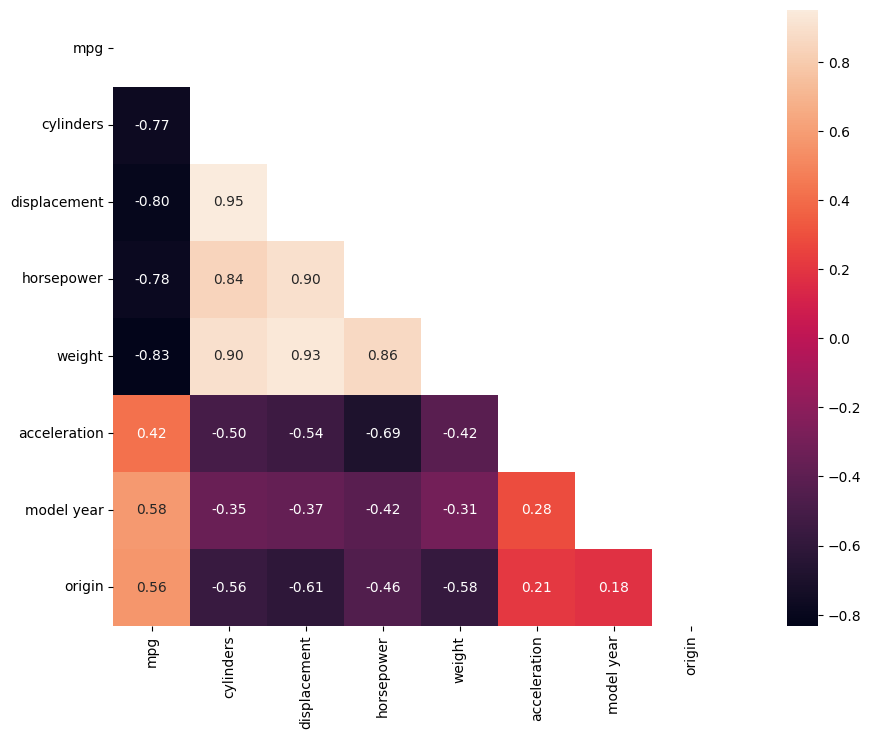

In [ ]:
plt.figure(figsize=(15,8))
corr=df.corr()
mask=np.triu(corr)
sns.heatmap(corr,square=True,mask=mask,annot=True,fmt='.2f')
plt.show()

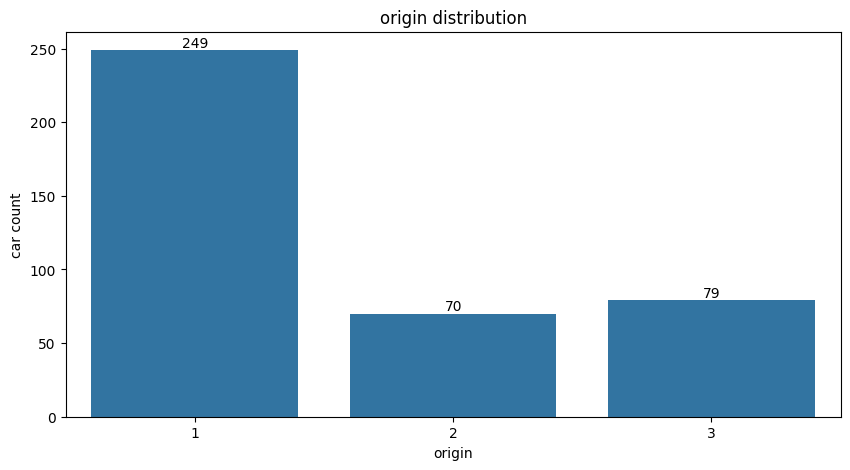

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='origin')
ax.bar_label(ax.containers[0],label_type='edge')
plt.title("origin distribution")
plt.xlabel("origin")
plt.ylabel("car count")
plt.show()

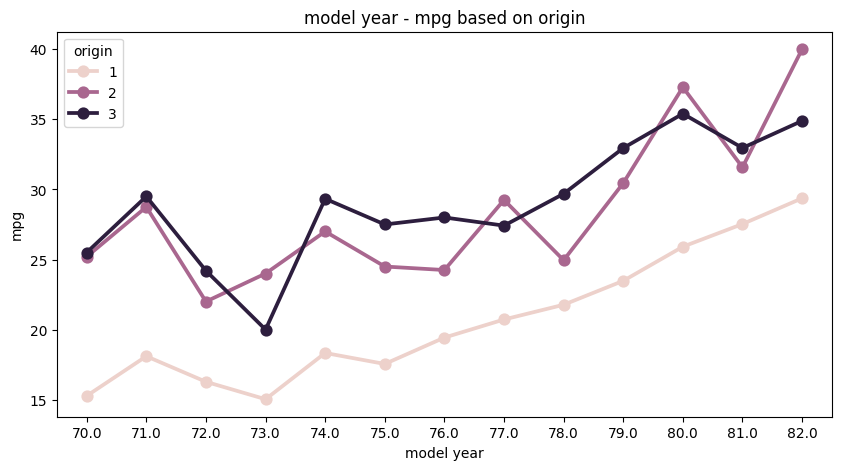

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x='model year',y = 'mpg',hue='origin',data=df,errorbar=None);
plt.title("model year - mpg based on origin")
plt.xlabel("model year")
plt.ylabel("mpg")
plt.show()

In [ ]:
X=df.drop('mpg',axis=1)
y=df[['mpg']]
X.shape
y.shape

(398, 1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [ ]:
ridge = Ridge(alpha=0.2)
ridge.fit(X_train,y_train)

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
lasso=Lasso(alpha=0.5)
lasso.fit(X_train,y_train)

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
dlastec=ElastecNet(alpha=0.5,l1_ratio=0.2)
elastic.fit(x_train,y_train)

NameError: name 'ElastecNet' is not defined

In [ ]:
print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

In [ ]:
print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_rest))

In [ ]:
print(lasso.score(x_train,y_train))
print(lasso.score(x test,y_test))

In [ ]:
# ///////////////////////////////////////////////////////

In [ ]:
# video 26

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
import numpy as np

In [ ]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
model=ElasticNet()
params = {
             'alpha':[1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
            }
grid_search = GridSearchCV(
                            estimator=model,
                            param_grid=params,
                            scoring='r2',
                            cv=5,
                           )
grid_search.fit(X_train, y_train)

print("Grid Search:\n===========================")
print(f"Best Parameters:{grid_search.best_params_}")
print(f"Best R2 Score:{grid_search.best_score_}")

Grid Search:
Best Parameters:{'alpha': 0.01, 'l1_ratio': 0.1}
Best R2 Score:0.9127508410382201


In [ ]:
////////////////////////////////\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import ElasticNet
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

ImportError: cannot import name 'SelectkBest' from 'sklearn.feature_selection' (/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/__init__.py)

In [55]:
# df=pd.read_csv('housing_data.csv')
# df.head(3)

df=pd.read_csv('wine.csv')
df.head(3)


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [ ]:
# df.head()
# df.shape
# df.columns
# df.dtypes
# df.duplicated().sum()
# df.nunique()

In [56]:
X=df.drop(labels=['Mg'], axis=1)
y=df['Mg']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [57]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.61456745, 0.04790004, 0.028141  , 0.        , 0.        ,
       0.11044161, 0.04868793, 0.08628087, 0.        , 0.17170427,
       0.12446804, 0.        , 0.1095894 ])

In [58]:
mutual_info = pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

,0
Wine,0.614567
Color.int,0.171704
Hue,0.124468
Phenols,0.110442
Proline,0.109589
Nonflavanoid.phenols,0.086281
Flavanoids,0.048688
Alcohol,0.047900
Malic.acid,0.028141
Ash,0.000000


<Axes: >

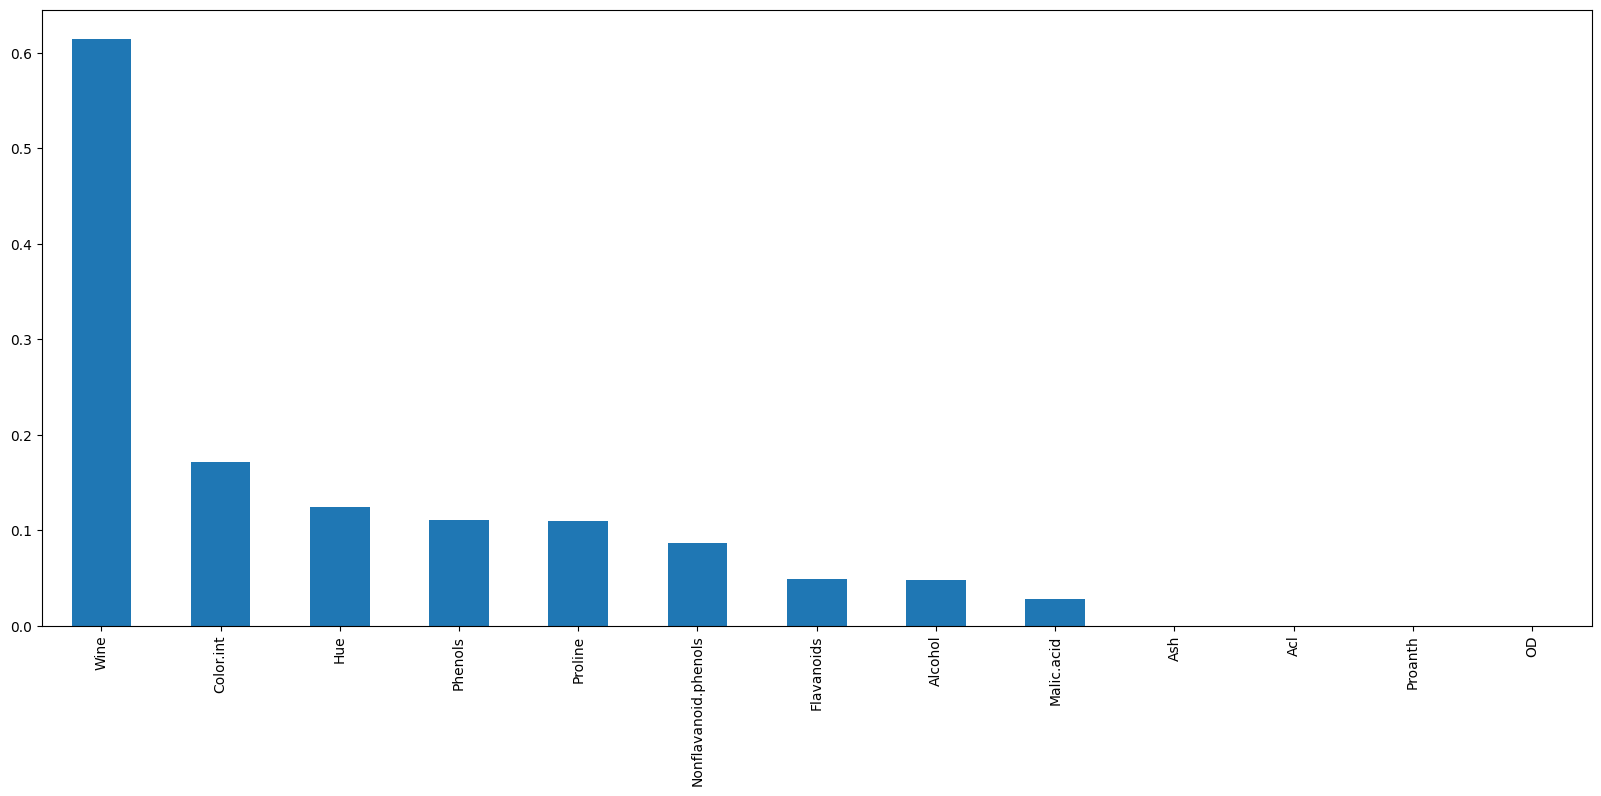

In [59]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [72]:
k_best_features = SelectKBest(mutual_info_classif, k=5)
k_best_features.fit(X_train, y_train)
X_train.columns[k_best_features.get_support()]

Index(['Wine', 'Phenols', 'Nonflavanoid.phenols', 'Color.int', 'Hue'], dtype='object')

In [ ]:
df['MSZoning'].value_counts()

In [ ]:
features_to_encode = ['LotShape']
le = LabelEncoder()
for feature in features_to_encode:
  df['LotShape'] = le.fit_transform(df['LotShape'])
df.head()

# 'MSZoning','Street','SaleType','SaleCondition'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.nunique()

,0
Wine,3
Alcohol,126
Malic.acid,133
Ash,79
Acl,63
Mg,53
Phenols,97
Flavanoids,132
Nonflavanoid.phenols,39
Proanth,101


In [9]:
X=df.drop(labels=['Flavanoids'], axis=1)
X.shape

(178, 13)

In [10]:
constant_features = [col for col in X.columns if X[col].nunique() <= 5]
constant_features

['Wine']

In [11]:
df=df.drop(labels=constant_features, axis=1)
df.head()
df.shape


(178, 13)

In [19]:
quasi_constants = []
for col in X.columns:
  feature_freq= X[col].value_counts(normalize=True).sort_values(ascending=False).values[0]
  print(feature_freq)
  if feature_freq > 0.5:
    quasi_constants.append(col)
  quasi_constants

0.398876404494382
0.033707865168539325
0.03932584269662921
0.03932584269662921
0.08426966292134831
0.07303370786516854
0.0449438202247191
0.06179775280898876
0.05056179775280899
0.02247191011235955
0.0449438202247191
0.028089887640449437
0.028089887640449437


In [13]:
df=df.drop(labels=quasi_constants, axis=1)
df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
duplicate_columns = []
for i in range(len(X.columns)):
  col1 = X.columns[i]
  for j in range(i + 1, len(X.columns)):
    col2 = X.columns[j]
    if X[col1].equals(X[col2]):
      duplicate_columns.append(col2)
duplicate_columns

[]

KeyError: "['wine'] not found in axis"

NameError: name 'mutual_info_classif' is not defined